# **Asset Analyst Meta Data and Volatility Analysis**

In [ ]:
! pip install arch

In [ ]:
! pip install alpha_vantage
! pip install alpha_vantage panda

In [ ]:
import yfinance as yf
from alpha_vantage.fundamentaldata import FundamentalData
from arch import arch_model
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.stattools import grangercausalitytests

# Preformance

In [ ]:
ticker = ['AAPL', 'NVDA', 'TSM', 'AVGO', 'ASML', 'AMD', 'CSCO', 'QCOM', 'TXN', 'RTX', 'HON',
          'LMT', 'ARM', 'BA', 'ADI']
end_date = dt.datetime.today()
start_date = end_date - dt.timedelta(days=1000)
df = yf.download(ticker, interval='1d', start=start_date, end=end_date)
df.head()

[*********************100%%**********************]  15 of 15 completed


Price        Adj Close                                                     \
Ticker            AAPL         ADI         AMD ARM        ASML       AVGO   
Date                                                                        
2021-11-16  148.901962  178.496780  152.449997 NaN  836.522888  53.140274   
2021-11-17  151.357391  177.897552  151.339996 NaN  835.463257  53.221561   
2021-11-18  155.676514  178.896225  155.020004 NaN  854.574463  53.704586   
2021-11-19  158.319275  179.571518  155.410004 NaN  833.237244  53.135601   
2021-11-22  158.782776  176.432816  152.520004 NaN  802.694519  51.693039   

Price                                                      ...    Volume  \
Ticker              BA       CSCO         HON         LMT  ...      AVGO   
Date                                                       ...             
2021-11-16  225.800003  52.328129  209.926804  315.794403  ...  13194000   
2021-11-17  226.619995  52.107803  209.092270  317.297394  ...  12532000   
2021-11-18  227.250000  49.234348  209.291412  317.380890  ...  12712000   
2021-11-19  214.130005  48.885494  207.195679  316.787140  ...  19612000   
2021-11-22  209.899994  50.124844  206.863739  320.071594  ...  25898000   

Price                                                                  \
Ticker            BA      CSCO      HON      LMT       NVDA      QCOM   
Date                                                                    
2021-11-16  10120200  21136900  1648500  1307500  264484000  33338200   
2021-11-17  10750900  31496300  1896600  1751000  428508000  21678900   
2021-11-18  10983700  70834000  1688300  1431300  781711000  15542600   
2021-11-19  20844100  30030800  2096100  1426500  533867000  11889100   
2021-11-22  10764300  39949300  2451600  1229400  754335000  16062800   

Price                                   
Ticker          RTX       TSM      TXN  
Date                                    
2021-11-16  4746200   5555100  3312000  
2021-11-17  3910600   6391400  4167800  
2021-11-18  4376300  13229700  4677300  
2021-11-19  5478200   9071800  5129100  
2021-11-22  6819800  16076100  4712300  

[5 rows x 90 columns]

In [ ]:
df_close = df['Adj Close']
df_close

Ticker,AAPL,ADI,AMD,ARM,ASML,AVGO,BA,CSCO,HON,LMT,NVDA,QCOM,RTX,TSM,TXN
Date,,,,,,,,,,,,,,,
2021-11-16,148.901962,178.496780,152.449997,NaN,836.522888,53.140274,225.800003,52.328129,209.926804,315.794403,30.153814,171.102371,83.099243,112.103813,173.971756
2021-11-17,151.357391,177.897552,151.339996,NaN,835.463257,53.221561,226.619995,52.107803,209.092270,317.297394,29.213352,172.730499,81.743851,113.034210,174.940704
2021-11-18,155.676514,178.896225,155.020004,NaN,854.574463,53.704586,227.250000,49.234348,209.291412,317.380890,31.623419,175.346786,81.715660,117.145065,178.539719
2021-11-19,158.319275,179.571518,155.410004,NaN,833.237244,53.135601,214.130005,48.885494,207.195679,316.787140,32.931290,174.104523,80.324104,117.971016,180.099335
2021-11-22,158.782776,176.432816,152.520004,NaN,802.694519,51.693039,209.899994,50.124844,206.863739,320.071594,31.903959,170.716522,81.612236,118.436234,177.644608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-05,209.270004,200.559998,134.820007,110.449997,820.349976,142.080002,167.029999,44.740002,199.710007,545.380005,100.449997,157.949997,115.169998,147.949997,181.190002
2024-08-06,207.229996,204.880005,130.179993,113.389999,843.010010,143.919998,165.039993,45.160000,198.800003,541.559998,104.250000,158.720001,114.400002,155.389999,186.949997
2024-08-07,209.820007,201.309998,128.669998,107.089996,836.349976,136.270004,163.240005,45.119999,197.919998,548.510010,98.910004,156.119995,114.150002,155.039993,184.070007


In [ ]:
# function calculate returns dataframe from close dataframe
def calc_returns(data):
  returns = pd.DataFrame(index=data.index)
  for col in data.columns:
    returns[col] = data[col].pct_change()
  returns = returns.dropna()
  return returns

In [ ]:
df_sector = calc_returns(df_close)
df_sector

,AAPL,ADI,AMD,ARM,ASML,AVGO,BA,CSCO,HON,LMT,NVDA,QCOM,RTX,TSM,TXN
Date,,,,,,,,,,,,,,,
2023-09-15,-0.004154,-0.008516,-0.048204,-0.044661,-0.040585,-0.022899,-0.004497,-0.005854,-0.002687,-0.004320,-0.036879,-0.007892,0.003974,-0.024270,-0.020657
2023-09-18,0.016913,0.008869,0.008671,-0.045267,0.001793,-0.001973,-0.014367,0.001249,0.007356,0.013701,0.001503,-0.003447,-0.008180,-0.004706,0.001291
2023-09-19,0.006181,-0.005397,-0.007424,-0.048793,-0.006625,-0.000941,-0.003120,-0.004812,0.004577,-0.010585,-0.010144,-0.018004,-0.001330,-0.007430,0.001904
2023-09-20,-0.019992,-0.014937,-0.012499,-0.040964,-0.006551,-0.016611,-0.010319,-0.006089,-0.004658,0.003856,-0.029435,-0.013548,-0.008657,-0.009981,-0.006375
2023-09-21,-0.008890,-0.012721,-0.042157,-0.014175,-0.013155,-0.026741,-0.011958,-0.038919,-0.015480,-0.022040,-0.028931,-0.011536,-0.024050,-0.022110,-0.010487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-05,-0.048167,-0.035584,0.017509,-0.026443,0.013591,-0.012098,-0.017182,-0.041149,-0.019539,-0.006177,-0.063578,-0.008537,-0.010907,-0.012745,-0.033447
2024-08-06,-0.009748,0.021540,-0.034416,0.026618,0.027622,0.012950,-0.011914,0.009388,-0.004557,-0.007004,0.037830,0.004875,-0.006686,0.050287,0.031790
2024-08-07,0.012498,-0.017425,-0.011599,-0.055560,-0.007900,-0.053154,-0.010906,-0.000886,-0.004427,0.012833,-0.051223,-0.016381,-0.002185,-0.002252,-0.015405


In [ ]:
equity = df_sector.apply(lambda x: (1+x).cumprod()-1, axis=0)

Text(0, 0.5, 'Periodic Returns')

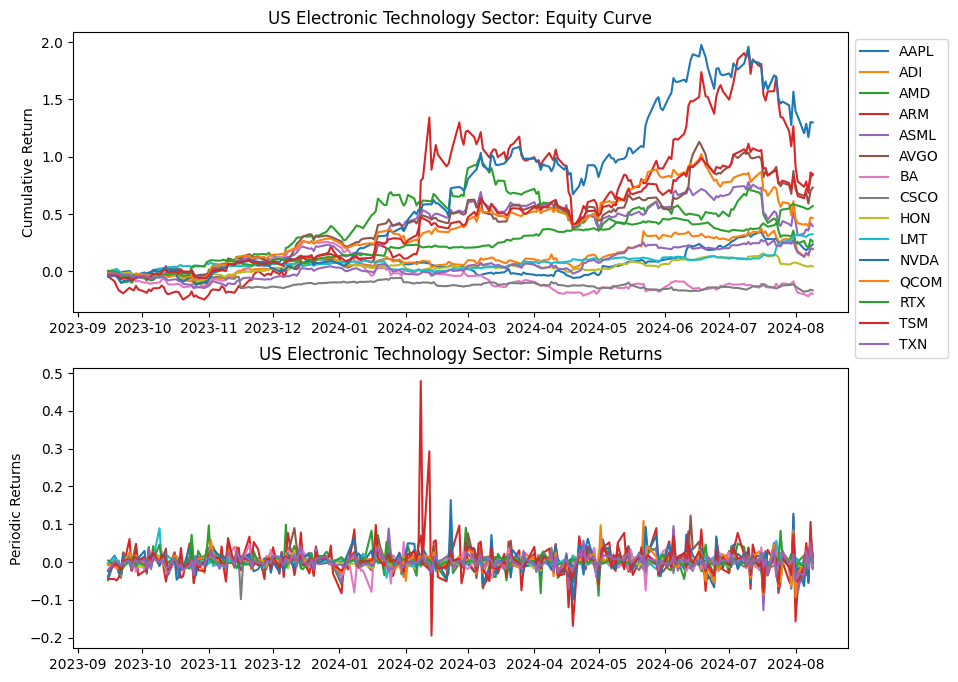

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
ax[0].plot(equity, label=equity.columns)
ax[0].set_title('US Electronic Technology Sector: Equity Curve')
ax[0].set_ylabel('Cumulative Return')
ax[0].legend(bbox_to_anchor=[1, 1])
ax[1].plot(df_sector)
ax[1].set_title('US Electronic Technology Sector: Simple Returns')
ax[1].set_ylabel('Periodic Returns')

performance industry

In [ ]:
ticker = ['AAPL', 'CSCO', 'MSI', 'GRMN', 'ERIC', 'NOK', 'UI', 'CIEN', 'CALX',
          'VSAT', 'HLIT', 'INFN', 'ARLO', 'DGII', 'CLFD']
end_date = dt.datetime.today()
start_date = end_date - dt.timedelta(days=1000)
df = yf.download(ticker, interval='1d', start=start_date, end=end_date)

[*********************100%%**********************]  15 of 15 completed


In [ ]:
df_close = df['Adj Close']
df_sector = calc_returns(df_close)
df_sector = df_sector[(df_sector.index >= '2023-09-15') & (df_sector.index <= '2024-08-15')]
equity = df_sector.apply(lambda x: (1+x).cumprod()-1, axis=0)

Text(0, 0.5, 'Periodic Returns')

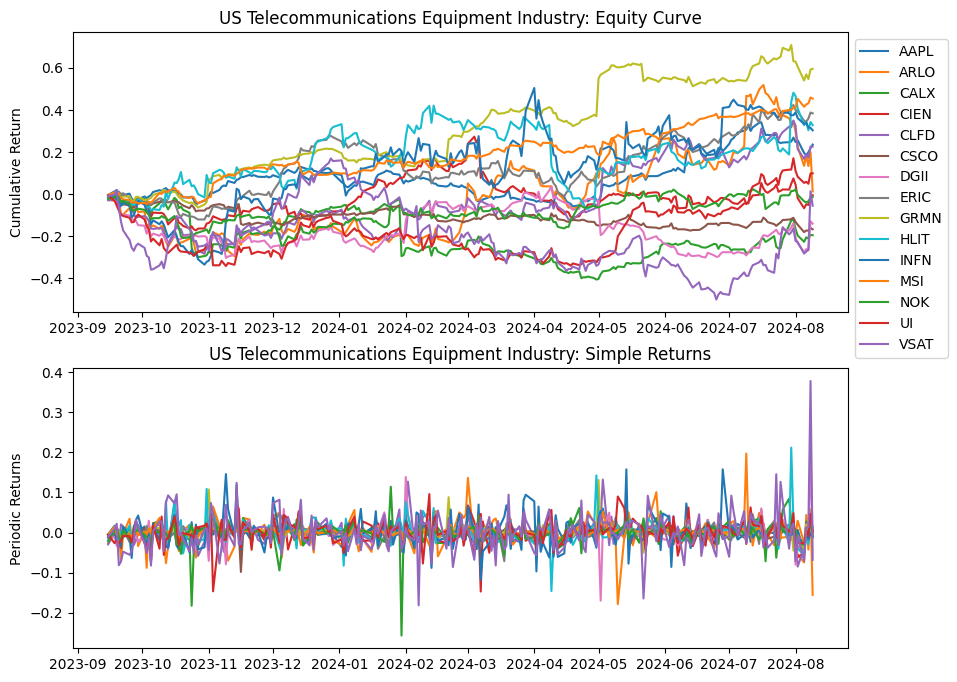

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
ax[0].plot(equity, label=equity.columns)
ax[0].set_title('US Telecommunications Equipment Industry: Equity Curve')
ax[0].set_ylabel('Cumulative Return')
ax[0].legend(bbox_to_anchor=[1, 1])
ax[1].plot(df_sector)
ax[1].set_title('US Telecommunications Equipment Industry: Simple Returns')
ax[1].set_ylabel('Periodic Returns')

market performance

In [ ]:
ticker = ['AAPL', '^GSPC']
end_date = dt.datetime.today()
start_date = end_date - dt.timedelta(days=1000)
df = yf.download(ticker, interval='1d', start=start_date, end=end_date)

[*********************100%%**********************]  2 of 2 completed


In [ ]:
df_close = df['Adj Close']
df_sector = calc_returns(df_close)
df_sector = df_sector[(df_sector.index >= '2023-09-15') & (df_sector.index <= '2024-08-15')]
equity = df_sector.apply(lambda x: (1+x).cumprod()-1, axis=0)

Text(0, 0.5, 'Periodic Returns')

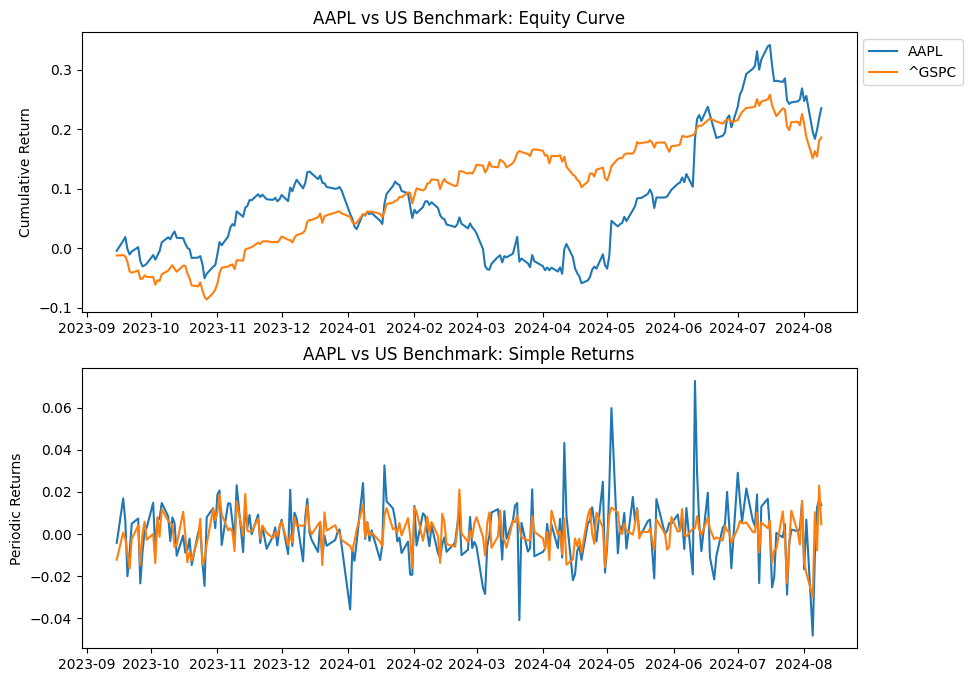

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
ax[0].plot(equity, label=equity.columns)
ax[0].set_title('AAPL vs US Benchmark: Equity Curve')
ax[0].set_ylabel('Cumulative Return')
ax[0].legend(bbox_to_anchor=[1, 1])
ax[1].plot(df_sector)
ax[1].set_title('AAPL vs US Benchmark: Simple Returns')
ax[1].set_ylabel('Periodic Returns')

# Firm Ratings

In [ ]:
tick = 'AAPL'
aapl = yf.Ticker(tick)

In [ ]:
reco = aapl.get_recommendations_summary() # ratings from present month '0m'
reco = reco.set_index('period')
fg = aapl.upgrades_downgrades
print(reco, fg)

        strongBuy  buy  hold  sell  strongSell
period                                        
0m             11   21     6     0           0
-1m            12   19    12     1           0
-2m            10   19    13     1           0
-3m            10   24     7     1           0                                   Firm       ToGrade       FromGrade Action
GradeDate                                                                  
2024-08-06 16:12:26     Morgan Stanley    Overweight      Overweight   main
2024-08-05 19:33:19            Needham           Buy             Buy   reit
2024-08-02 17:44:09        Maxim Group          Hold            Hold   main
2024-08-02 15:57:25         Rosenblatt           Buy             Buy   main
2024-08-02 13:04:02            Wedbush    Outperform      Outperform   main
...                                ...           ...             ...    ...
2014-03-11 12:00:00      Pacific Crest    Outperform  Sector Perform     up
2014-03-03 12:56:38  Canaccord Gen

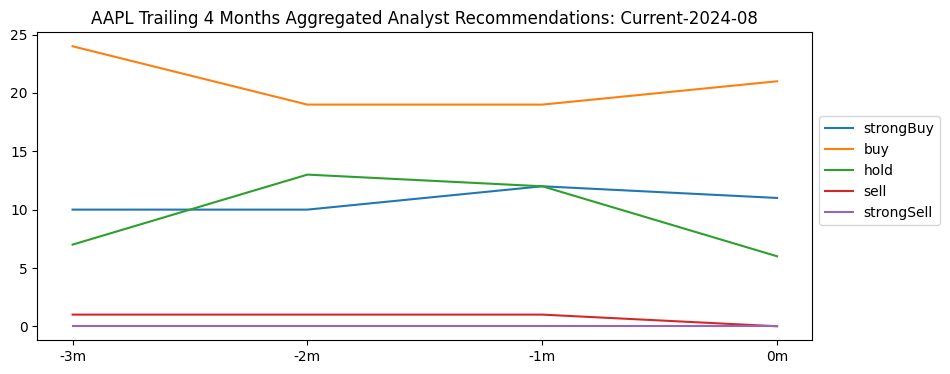

In [ ]:
reco_reverse = reco.iloc[::-1]
plt.figure(figsize=(10, 4))
end_date = dt.datetime.today()
plt.plot(reco_reverse.index, reco_reverse, label = reco_reverse.columns)
plt.title(f"{tick} Trailing 4 Months Aggregated Analyst Recommendations: Current-{end_date.strftime('%Y-%m')}")
plt.legend()
plt.legend(bbox_to_anchor=[1, 0.75])

In [ ]:
# Summarize 'to grade' and 'from grade' for all firms
pivot_table = pd.pivot_table(
    fg,
    values=['ToGrade', 'FromGrade'],
    index='Firm',
    aggfunc='count'  # Count the occurrences of each grade change per firm
)
pivot_table

,FromGrade,ToGrade
Firm,,
Argus Research,5,5
Atlantic Equities,3,3
B of A Securities,66,66
BMO Capital,12,12
BTIG,5,5
...,...,...
UBS,37,37
Wedbush,58,58
Wells Fargo,19,19


Text(0.5, 1.0, 'Number of Grade Changes per Firm Covering AAPL Since 2012: Current-2024-08')

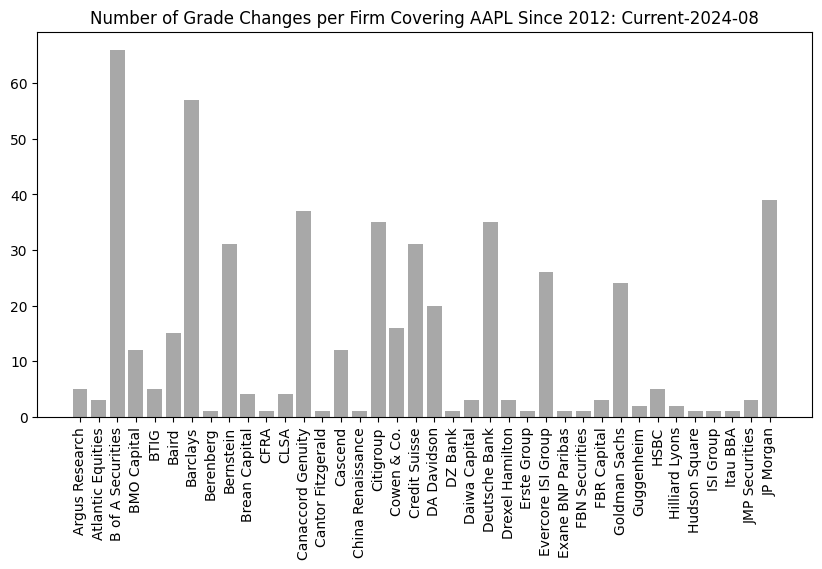

In [ ]:
# batr plot of firm rating changes since 2012
plt.figure(figsize=(10, 5))
plt.bar(pivot_table.index[:38], pivot_table[:38]['FromGrade'], color='#a8a8a8')
plt.xticks(rotation=90)
plt.title(f"Number of Grade Changes per Firm Covering {tick} Since 2012: Current-{end_date.strftime('%Y-%m')}")

In [ ]:
fgdata = pd.DataFrame(fg)
fgdatasub = fgdata[['Firm', 'ToGrade']]
fgdatasub.loc[:,'ToGrade'] = fgdatasub['ToGrade'].ffill()
fgdatasub

,Firm,ToGrade
GradeDate,,
2024-08-06 16:12:26,Morgan Stanley,Overweight
2024-08-05 19:33:19,Needham,Buy
2024-08-02 17:44:09,Maxim Group,Hold
2024-08-02 15:57:25,Rosenblatt,Buy
2024-08-02 13:04:02,Wedbush,Outperform
...,...,...
2014-03-11 12:00:00,Pacific Crest,Outperform
2014-03-03 12:56:38,Canaccord Genuity,Buy
2014-02-20 12:24:13,Barclays,Equal-weight


In [ ]:
# Group by Firm and ToGrade, then count the occurrences
grouped = fgdatasub.groupby(['Firm', 'ToGrade']).size().unstack(fill_value=0)

<ipython-input-77-27a5fd236bf8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = fgdatasub.groupby(['Firm', 'ToGrade']).size().unstack(fill_value=0)


In [ ]:
groupedsub = grouped.iloc[:38,]
groupedsub.columns

CategoricalIndex(['', 'Buy', 'Equal-Weight', 'Equal-weight', 'Hold',
                  'Market Outperform', 'Market Perform', 'Negative', 'Neutral',
                  'Outperform', 'Overweight', 'Peer Perform', 'Perform',
                  'Positive', 'Reduce', 'Sector Perform', 'Sector Weight',
                  'Sell', 'Strong Buy', 'Underperform', 'Underweight'],
                 categories=['', 'Buy', 'Equal-Weight', 'Equal-weight', ..., 'Sell', 'Strong Buy', 'Underperform', 'Underweight'], ordered=False, dtype='category', name='ToGrade')

In [ ]:
# Define unique colors for each ToGrade
to_grade_colors = {'': '#A5BE00',
                   'Buy': '#A5BE00',
                   'Equal-Weight': '#72BDA3',
                   'Equal-weight': '#72BDA3',
                   'Hold': '#14BDEB',
                   'Market Outperform': '#3DFF50',
                   'Market Perform': '#C200FB',
                   'Negative': '#EA001F',
                   'Neutral': '#FFBC0A',
                   'Outperform': '#587D71',
                   'Overweight': '#F06449',
                   'Peer Perform': '#00AFB5',
                   'Perform': '#BDD358',
                   'Positive': '#AEF3E7',
                   'Reduce': '#FE5F00',
                   'Sector Perform': '#D5FFD9',
                   'Sector Weight': '#85C7F2',
                   'Sell': '#DB2B39',
                   'Strong Buy': '#8FF7A7',
                   'Underperform': '#A31621',
                   'Underweight': '#64E9EE'}

# Use colors as a list for plotting
colors = [to_grade_colors[col] for col in groupedsub.columns]
colors

['#A5BE00',
 '#A5BE00',
 '#72BDA3',
 '#72BDA3',
 '#14BDEB',
 '#3DFF50',
 '#C200FB',
 '#EA001F',
 '#FFBC0A',
 '#587D71',
 '#F06449',
 '#00AFB5',
 '#BDD358',
 '#AEF3E7',
 '#FE5F00',
 '#D5FFD9',
 '#85C7F2',
 '#DB2B39',
 '#8FF7A7',
 '#A31621',
 '#64E9EE']

Text(0, 0.5, 'Rating Changes')

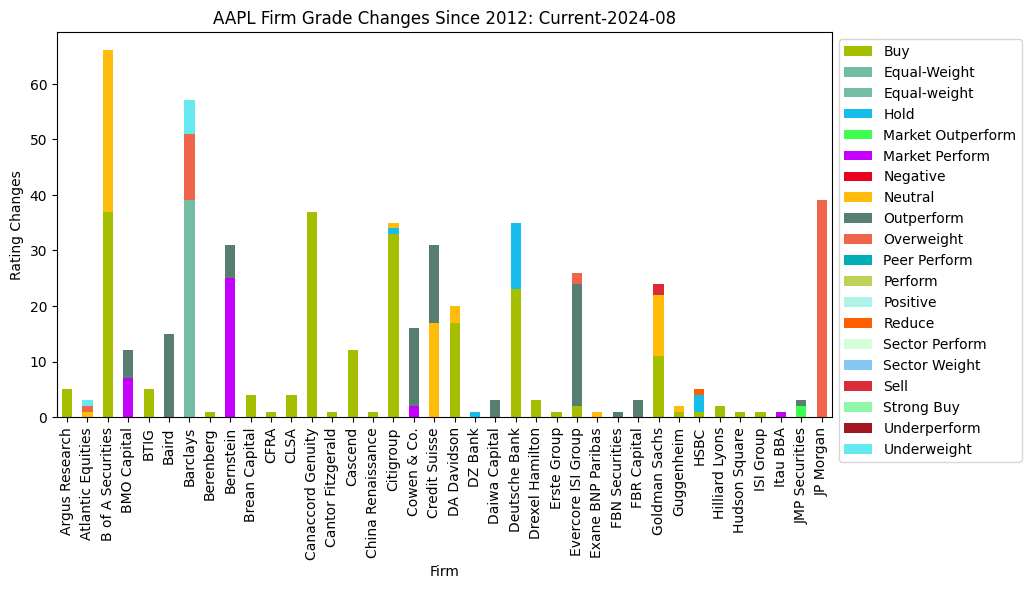

In [ ]:
# Plot the stacked bar plot
ax = groupedsub.plot(kind='bar', stacked=True, figsize=(10, 5), color=colors)
plt.legend(bbox_to_anchor=[1, 1])
plt.title(f"{tick} Firm Grade Changes Since 2012: Current-{end_date.strftime('%Y-%m')}")
plt.ylabel('Rating Changes')

In [ ]:
firm = 'Goldman Sachs'
gs = fgdata[fgdata['Firm'] == firm]
gs

# Volatility Analysis

In [ ]:
ticker = ['AAPL', '^VIX']
end_date = dt.datetime.today()
start_date = end_date - dt.timedelta(days=1000)
df = yf.download(ticker, interval='1d', start=start_date, end=end_date)
df.head()

[*********************100%%**********************]  2 of 2 completed


Price        Adj Close                  Close                   High  \
Ticker            AAPL       ^VIX        AAPL       ^VIX        AAPL   
Date                                                                   
2021-11-16  148.901962  16.370001  151.000000  16.370001  151.490005   
2021-11-17  151.357407  17.110001  153.490005  17.110001  155.000000   
2021-11-18  155.676544  17.590000  157.869995  17.590000  158.669998   
2021-11-19  158.319305  17.910000  160.550003  17.910000  161.020004   
2021-11-22  158.782745  19.170000  161.020004  19.170000  165.699997   

Price                         Low                   Open             \
Ticker           ^VIX        AAPL       ^VIX        AAPL       ^VIX   
Date                                                                  
2021-11-16  17.080000  149.339996  16.030001  149.940002  16.860001   
2021-11-17  17.190001  150.990005  16.280001  151.000000  16.360001   
2021-11-18  18.150000  153.050003  16.379999  153.710007  16.809999   
2021-11-19  19.010000  156.529999  17.230000  157.649994  17.360001   
2021-11-22  19.590000  161.000000  17.350000  161.679993  18.200001   

Price            Volume       
Ticker             AAPL ^VIX  
Date                          
2021-11-16   59256200.0    0  
2021-11-17   88807000.0    0  
2021-11-18  137827700.0    0  
2021-11-19  117305600.0    0  
2021-11-22  117467900.0    0

In [ ]:
df['contin_returns_AAPL'] = np.log(df['Adj Close']['AAPL']/df['Adj Close']['AAPL'].shift(1))
df = df.dropna()

In [ ]:
aapl_garch = arch_model(df.loc[:,'contin_returns_AAPL'], p=1, q=1, mean='constant', vol='GARCH', dist='normal', rescale=True)
aaplgarchfit = aapl_garch.fit(update_freq=4, disp='off')
df.loc[:,'GARCH_vol_AAPL'] = aaplgarchfit.conditional_volatility.values

In [ ]:
def standerdise(series):
  z = (series - series.mean()) / series.std()
  return z

In [ ]:
aapl_garch_vol_standerdise = standerdise(df.loc[:,'GARCH_vol_AAPL'])
vix_standerdise = standerdise(df['Adj Close']['^VIX'])

In [ ]:
vol_corr = df['GARCH_vol_AAPL'].shift(-3).rolling(60).corr(df['Adj Close']['^VIX'])

Text(0.5, 1.0, 'APPL (3 Day Forward Lagged) and VIX 60 Day Fixed Rolling Window Correlation Average')

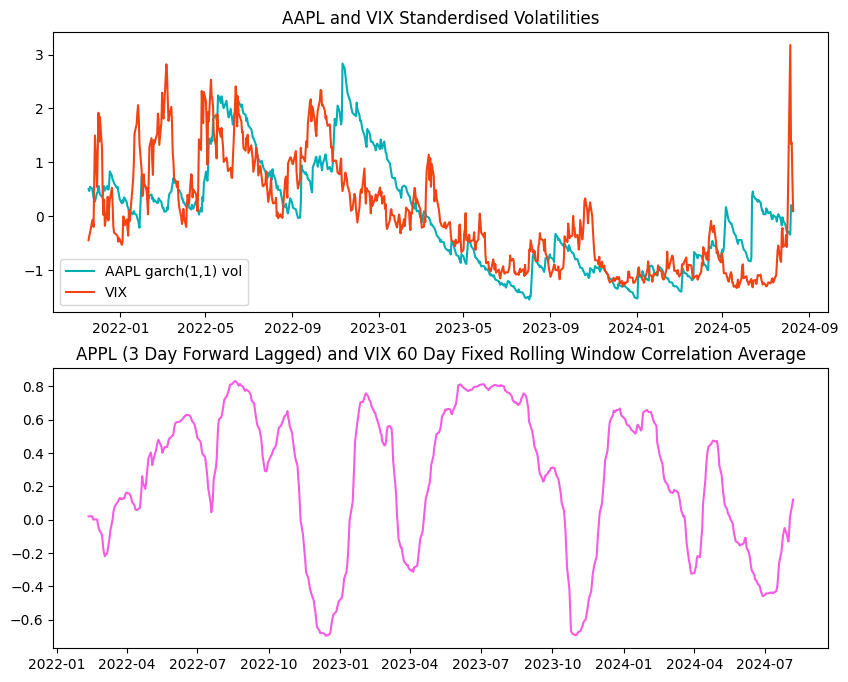

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
axes[0].plot(df.index, aapl_garch_vol_standerdise, color='#00AFB5')
axes[0].plot(df.index, vix_standerdise, color='#F34213')
axes[0].set_title('AAPL and VIX Standerdised Volatilities')
axes[0].legend(['AAPL garch(1,1) vol', 'VIX'])
axes[1].plot(vol_corr, color='#F65BE3')
axes[1].set_title('APPL (3 Day Forward Lagged) and VIX 60 Day Fixed Rolling Window Correlation Average')

we test whether the series are cointigrated, this tells us if a linear combination of our series is stationary. H0 here is that the series are not cointigrated and H1 that they are.

We first however test for a unit root using the ADF test, where a unit root is evidence of non stationarity, H0 here is non stationarity and H1 is stationarity.

If If both series are I(1), you can proceed to test for cointegration. If they are not integrated of the same order, cointegration tests are not appropriate.

In [ ]:
def test_stationarity(series):
    result = adfuller(series.dropna(), autolag='AIC')
    return result[1]  # p-value

print('p-value for X:', test_stationarity(aapl_garch_vol_standerdise))
print('p-value for Y:', test_stationarity(vix_standerdise))

p-value for X: 0.42175424017988555
p-value for Y: 0.03239169113436782


the p-value for either ADF test of >> than 0.05 significance level therfore the series is not stationary and a unit root exists

If the series are found to be non-stationary, perform differencing to achieve stationarity. The number of differencings required is the integration order: I(n) where n is the intigration order

In [ ]:
# prferm differencing
aapl_garch_vol_standerdise_I  = aapl_garch_vol_standerdise.diff().dropna() # defualt diff 1
vix_standerdise_I = vix_standerdise.diff().dropna()

# test for stationarity, if stationary we can procced to cointigration
print('p-value for X:', test_stationarity(aapl_garch_vol_standerdise_I))
print('p-value for Y:', test_stationarity(vix_standerdise_I))

p-value for X: 0.0
p-value for Y: 2.6009300222215874e-13


test for cointigration

In [ ]:
score, p_value, _ = coint(aapl_garch_vol_standerdise_I, vix_standerdise_I)

print(f"Cointegration Test Statistic: {score}")
print(f"p-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The series are cointegrated.")
else:
     print("The series are not cointegrated.")

Cointegration Test Statistic: -19.35043075393012
p-value: 0.0
The series are cointegrated.


testing for lagged relationshiop: given that our time series are now both stationarY after differencing and conferming using the ADF test (where p << 0.05 confirms that the series are stationary, ie H1) we can test for a legged relationsip using the ADF test

In [ ]:
max_lags = 10
data_gc = pd.DataFrame({'aapl': aapl_garch_vol_standerdise_I, 'vix': vix_standerdise_I})
test_result = grangercausalitytests(data_gc.dropna(), max_lags, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.8759  , p=0.0089  , df_denom=681, df_num=1
ssr based chi2 test:   chi2=6.9062  , p=0.0086  , df=1
likelihood ratio test: chi2=6.8715  , p=0.0088  , df=1
parameter F test:         F=6.8759  , p=0.0089  , df_denom=681, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.6622  , p=0.0036  , df_denom=678, df_num=2
ssr based chi2 test:   chi2=11.4080 , p=0.0033  , df=2
likelihood ratio test: chi2=11.3138 , p=0.0035  , df=2
parameter F test:         F=5.6622  , p=0.0036  , df_denom=678, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.2316  , p=0.0056  , df_denom=675, df_num=3
ssr based chi2 test:   chi2=12.8264 , p=0.0050  , df=3
likelihood ratio test: chi2=12.7073 , p=0.0053  , df=3
parameter F test:         F=4.2316  , p=0.0056  , df_denom=675, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.3693  , p=0.0096  

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


# Fundemental Data

In [ ]:
ticker = 'AAPL'


In [ ]:
apikey = 'DMHP8ANVXW6S461G'
fd = FundamentalData(apikey)
symbol_fd_data = fd.get_balance_sheet_quarterly(ticker)[0]

In [ ]:
symbol_fd_data['fiscalDateEnding'] = pd.to_datetime(symbol_fd_data["fiscalDateEnding"], format = "%Y-%m-%d") # to date time index
symbol_fd_data.set_index('fiscalDateEnding', inplace=True)

In [ ]:
symbol_fd_data

,reportedCurrency,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,accumulatedDepreciationAmortizationPPE,...,currentLongTermDebt,longTermDebtNoncurrent,shortLongTermDebtTotal,otherCurrentLiabilities,otherNonCurrentLiabilities,totalShareholderEquity,treasuryStock,retainedEarnings,commonStock,commonStockSharesOutstanding
fiscalDateEnding,,,,,,,,,,,,,,,,,,,,,
2024-06-30,USD,331612000000,125435000000,25565000000,61801000000,6165000000,43172000000,206177000000,44502000000,72627000000,...,12114000000,86196000000,101294000000,60889000000,47084000000,66708000000,None,-4726000000,79850000000,15222259000
2024-03-31,USD,337411000000,128416000000,32695000000,67150000000,6232000000,41150000000,208995000000,43546000000,71697000000,...,10762000000,91831000000,104597000000,57298000000,47564000000,74194000000,None,4339000000,78815000000,15337686000
2023-12-31,USD,353514000000,143692000000,40760000000,73100000000,6511000000,50102000000,209822000000,43666000000,72510000000,...,10954000000,95088000000,107998000000,54611000000,50353000000,74100000000,None,8242000000,75236000000,15460223000
2023-09-30,USD,352583000000,143566000000,29965000000,61555000000,6331000000,60985000000,209017000000,43715000000,70884000000,...,9822000000,95281000000,111088000000,58829000000,49848000000,62146000000,None,-214000000,73812000000,15550061000
2023-06-30,USD,335038000000,122659000000,28408000000,62482000000,7351000000,39186000000,212379000000,43550000000,70787000000,...,7216000000,98071000000,109293000000,58897000000,51730000000,60274000000,None,1408000000,70667000000,15647868000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-06-30,USD,64725000000,36033000000,9705000000,24288000000,942000000,3447000000,48281000000,2028000000,None,...,None,None,None,4452000000,4981000000,43111000000,None,32870000000,10133000000,913482347
2010-03-31,USD,57057000000,32336000000,10018000000,23155000000,638000000,2886000000,39766000000,3504000000,None,...,None,None,None,4021000000,4539000000,39348000000,None,29670000000,9553000000,909635811
2009-12-31,USD,53926000000,33332000000,7609000000,24796000000,576000000,3090000000,32503000000,3115000000,None,...,None,None,None,3996000000,4139000000,35768000000,None,26695000000,8962000000,906282182


In [ ]:
symbol_fd_data_subset = pd.DataFrame(symbol_fd_data)

In [ ]:
symbol_fd_data_subset = symbol_fd_data_subset.drop(columns=['reportedCurrency', 'treasuryStock'])

In [ ]:
symbol_fd_data_subset.columns

Index(['totalAssets', 'totalCurrentAssets',
       'cashAndCashEquivalentsAtCarryingValue', 'cashAndShortTermInvestments',
       'inventory', 'currentNetReceivables', 'totalNonCurrentAssets',
       'propertyPlantEquipment', 'accumulatedDepreciationAmortizationPPE',
       'intangibleAssets', 'intangibleAssetsExcludingGoodwill', 'goodwill',
       'investments', 'longTermInvestments', 'shortTermInvestments',
       'otherCurrentAssets', 'otherNonCurrentAssets', 'totalLiabilities',
       'totalCurrentLiabilities', 'currentAccountsPayable', 'deferredRevenue',
       'currentDebt', 'shortTermDebt', 'totalNonCurrentLiabilities',
       'capitalLeaseObligations', 'longTermDebt', 'currentLongTermDebt',
       'longTermDebtNoncurrent', 'shortLongTermDebtTotal',
       'otherCurrentLiabilities', 'otherNonCurrentLiabilities',
       'totalShareholderEquity', 'retainedEarnings', 'commonStock',
       'commonStockSharesOutstanding'],
      dtype='object')

In [ ]:
numeric_columns = [
    'totalAssets',
    'totalLiabilities',
    'totalShareholderEquity',
    'currentDebt'
]

# Apply conversion to each column
for column in numeric_columns:
    symbol_fd_data_subset[column] = pd.to_numeric(symbol_fd_data_subset[column], errors='coerce')

# Perform the division
key_metrics = symbol_fd_data_subset[numeric_columns] / 1000000
key_metrics['Leverge Ratio'] = key_metrics['totalLiabilities'] / key_metrics['totalShareholderEquity']

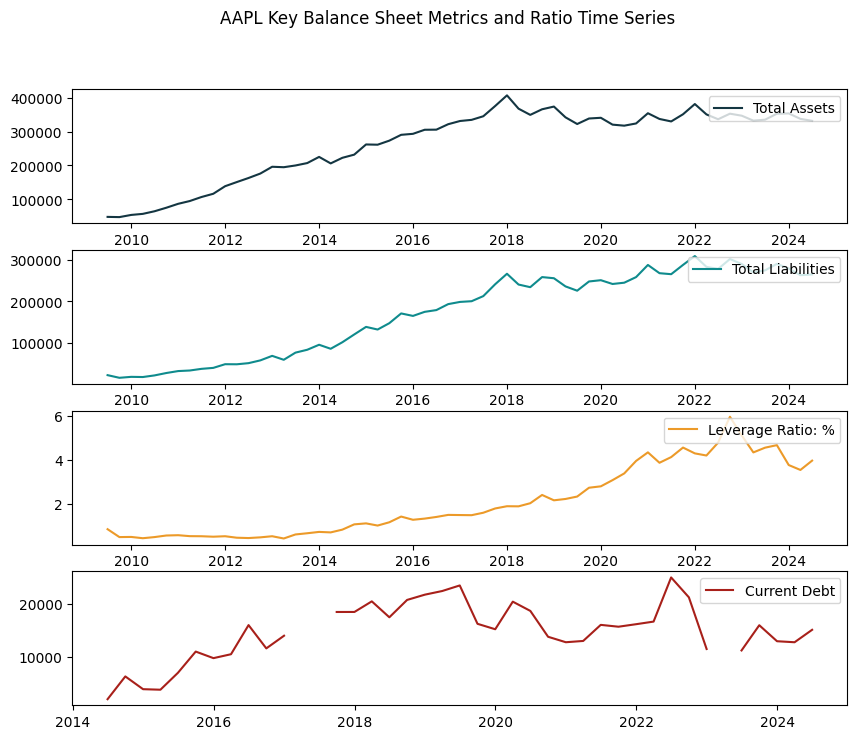

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 8))
ax[0].plot(key_metrics['totalAssets'], label='Total Assets', color='#143642')
ax[1].plot(key_metrics['totalLiabilities'], label='Total Liabilities', color='#0F8B8D')
ax[2].plot(key_metrics['Leverge Ratio'], label='Leverage Ratio: %', color='#EC9A29')
ax[3].plot(key_metrics['currentDebt'], label='Current Debt', color='#A8201A')
fig.suptitle(f'{ticker} Key Balance Sheet Metrics and Ratio Time Series')
# Add legends to each subplot
for axis in ax:
    axis.legend(loc='upper right')

In [ ]:
symbol_fd_data_subset.columns

Index(['totalAssets', 'totalCurrentAssets',
       'cashAndCashEquivalentsAtCarryingValue', 'cashAndShortTermInvestments',
       'inventory', 'currentNetReceivables', 'totalNonCurrentAssets',
       'propertyPlantEquipment', 'accumulatedDepreciationAmortizationPPE',
       'intangibleAssets', 'intangibleAssetsExcludingGoodwill', 'goodwill',
       'investments', 'longTermInvestments', 'shortTermInvestments',
       'otherCurrentAssets', 'otherNonCurrentAssets', 'totalLiabilities',
       'totalCurrentLiabilities', 'currentAccountsPayable', 'deferredRevenue',
       'currentDebt', 'shortTermDebt', 'totalNonCurrentLiabilities',
       'capitalLeaseObligations', 'longTermDebt', 'currentLongTermDebt',
       'longTermDebtNoncurrent', 'shortLongTermDebtTotal',
       'otherCurrentLiabilities', 'otherNonCurrentLiabilities',
       'totalShareholderEquity', 'retainedEarnings', 'commonStock',
       'commonStockSharesOutstanding'],
      dtype='object')